In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.10.0


In [3]:
# import some basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# divide the dataeset independent and dependent features
x = df.drop(["RowNumber","CustomerId","Surname","Exited"], axis=1)
y = df["Exited"]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
# Feature engineering
geo = pd.get_dummies(x["Geography"], drop_first= True)
gender = pd.get_dummies(x["Gender"], drop_first = True)

In [10]:
# Concatenate these variable with features
x = x.drop(["Geography", "Gender"], axis=1)

In [11]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [14]:
x = pd.concat([x, geo , gender], axis=1)

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
# splitting into train and test
from sklearn.model_selection import train_test_split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=0)

In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
x_train

array([[-0.09792126, -0.55759842, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-1.12612023,  0.01725942,  0.69700901, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274,  3.5622161 ,  0.00366482, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       ...,
       [ 0.89943174, -0.36597914,  0.00366482, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [-0.62230274, -0.07855022,  1.39035319, ..., -0.56987189,
         1.74467913, -1.08347268],
       [-0.28299708,  0.87954618, -1.38302356, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [23]:
x_test

array([[-0.55032881, -0.36597914,  1.0436811 , ...,  1.75478035,
        -0.5731713 , -1.08347268],
       [-1.31119605,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 , -1.08347268],
       [ 0.57040807,  0.30468834,  1.0436811 , ..., -0.56987189,
         1.74467913, -1.08347268],
       ...,
       [ 0.35448628,  0.11306906, -1.03635146, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.42646021,  2.89154862,  1.73702529, ..., -0.56987189,
        -0.5731713 ,  0.92295821],
       [ 0.82745781,  0.97535582, -0.34300727, ...,  1.75478035,
        -0.5731713 , -1.08347268]])

In [24]:
x_train.shape

(7000, 11)

In [25]:
x_test.shape

(3000, 11)

In [60]:
# Creating ANN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense  # for creating hidden layer , input layers
from tensorflow.keras.layers import LeakyReLU , PReLU , ReLU , ELU   # Activation functions
from tensorflow.keras.layers import Dropout  #reduce the overfitting

In [61]:
# lets initialize ANN
model = Sequential()

In [62]:
# Adding input layer
model.add(Dense(units=11 , activation= "relu"))

In [64]:
# first hidden layer
model.add(Dense(units=7 , activation="relu"))
model.add(Dropout(0.3))

In [65]:
# Second hidden layers
model.add(Dense(units=5 , activation="relu"))

In [66]:
# Adding the ouput layer
model.add(Dense(1, activation = "sigmoid"))

In [67]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [68]:
# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor = "val_loss",
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False,
)

In [69]:
model_history = model.fit(x_train , y_train , validation_split=0.33 , batch_size = 10 , epochs = 100 , callbacks=early_stopping)

Epoch 1/100
469/469 [==============================] - 3s 4ms/step - loss: 0.5326 - accuracy: 0.7788 - val_loss: 0.4783 - val_accuracy: 0.7962
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4762 - accuracy: 0.7985 - val_loss: 0.4658 - val_accuracy: 0.7962
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4663 - accuracy: 0.7985 - val_loss: 0.4532 - val_accuracy: 0.7962
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4475 - accuracy: 0.7985 - val_loss: 0.4437 - val_accuracy: 0.7962
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.4366 - accuracy: 0.7985 - val_loss: 0.4348 - val_accuracy: 0.7962
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4264 - accuracy: 0.8017 - val_loss: 0.4257 - val_accuracy: 0.8023
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4134 - accuracy: 0.8102 - val_loss: 0.4129 - val_accuracy: 0.8096

Epoch 58/100
469/469 [==============================] - 2s 4ms/step - loss: 0.3402 - accuracy: 0.8586 - val_loss: 0.3623 - val_accuracy: 0.8546
Epoch 59/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3393 - accuracy: 0.8588 - val_loss: 0.3637 - val_accuracy: 0.8533
Epoch 59: early stopping


In [70]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

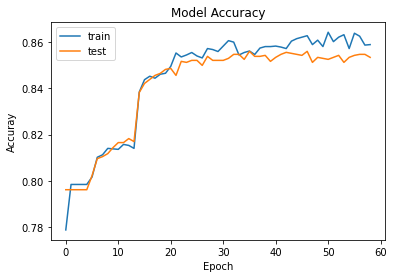

In [71]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuray")
plt.xlabel("Epoch")
plt.legend(["train" , "test"])
plt.show()

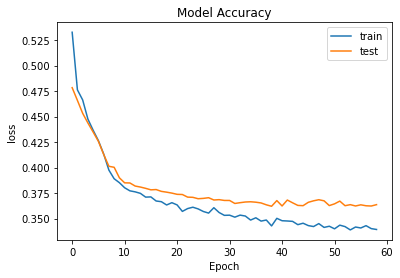

In [72]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Accuracy")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["train" , "test"])
plt.show()

In [73]:
# Making the prediction
y_pred = model.predict(x_test)
y_pred = (y_pred >= 0.5)

94/94 [==============================] - 0s 2ms/step


In [74]:
# confusion metrix
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_test , y_pred)

In [76]:
cm

array([[2224,  155],
       [ 289,  332]], dtype=int64)

In [77]:
# calculate accuracy
from sklearn.metrics import accuracy_score

In [78]:
score = accuracy_score(y_test , y_pred)

In [79]:
score

0.852

In [80]:
# getting the weights
model.get_weights()

[array([[-0.06207581,  0.1543912 , -0.07282237, -0.36287773,  0.14074649,
          0.21742652,  0.04104239,  0.6196649 , -0.12084254,  0.3104821 ,
         -0.38502294],
        [-0.27701125, -0.2361991 ,  0.33215907,  0.32696477,  0.25387287,
          0.40722412, -0.98834944, -0.33398208,  0.22266166, -0.7482427 ,
         -0.4420686 ],
        [ 0.06324612,  0.53086984,  0.14213262,  0.11896353,  0.32242662,
          0.00375807,  0.10395912,  0.10353703,  0.21787263,  0.03516945,
         -0.1329173 ],
        [ 0.08306366, -0.3571706 ,  0.04147906, -0.2587485 , -0.5497964 ,
          0.11226451, -0.23335132,  0.5290066 , -1.0305221 , -0.19612269,
          0.06497464],
        [ 0.7180219 , -0.00294954,  1.1102393 ,  0.04229923,  0.05623565,
         -0.11797877,  0.179546  ,  0.42660117, -1.4487716 ,  0.15959862,
          0.09924582],
        [ 0.0459892 , -0.10336382, -0.17141595, -0.8355672 ,  0.45135394,
          0.21787958, -0.13169965, -0.21943143, -0.12607415, -0.3502382